In [1]:
import pandas as pd
import numpy as np 
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
import warnings

warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 10, 5

In [2]:
r = requests.get('https://api.alternative.me/fng/?limit=0')

<Axes: xlabel='timestamp'>

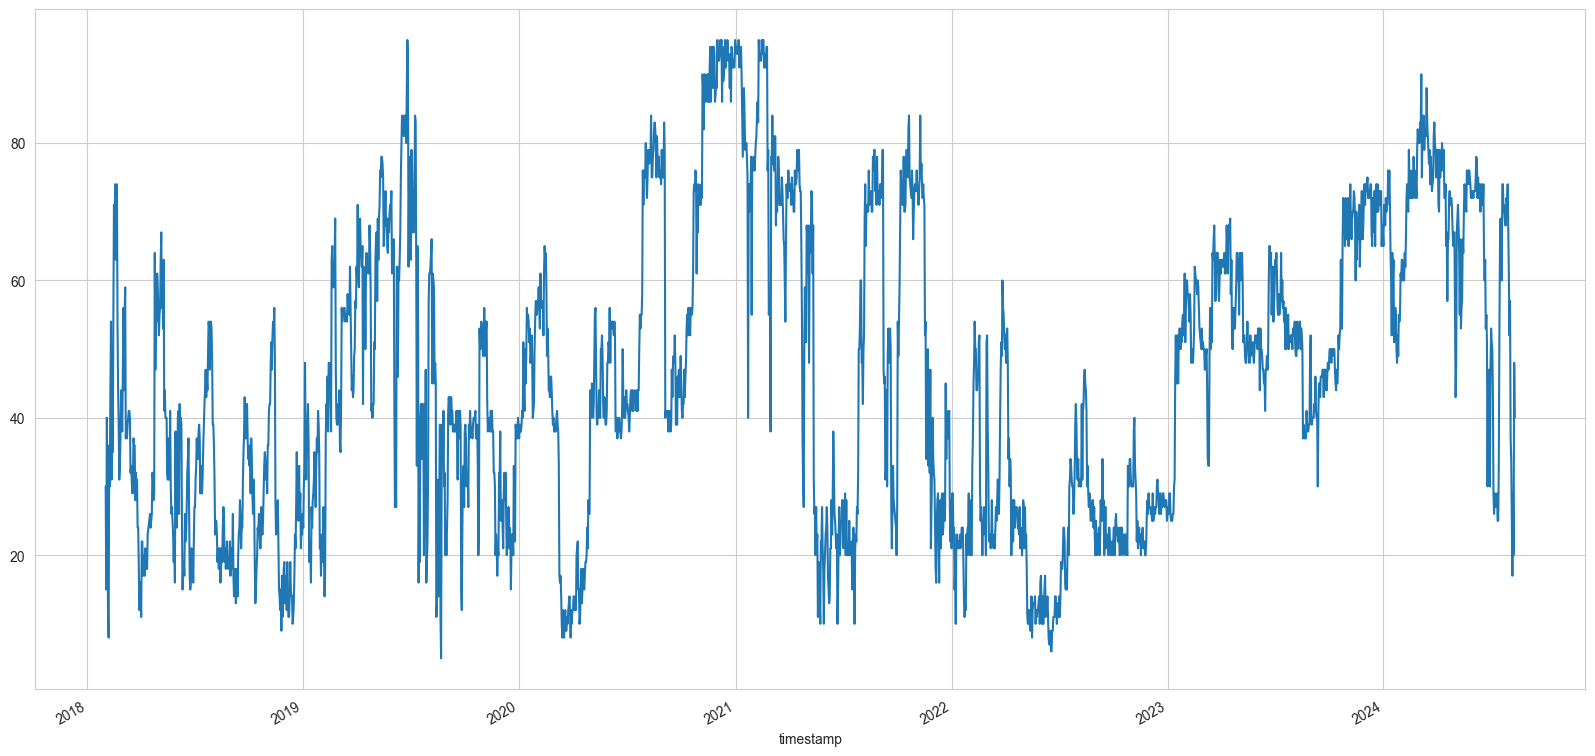

In [3]:
df = pd.DataFrame(r.json()['data'])
df.value = df.value.astype(int)
df.timestamp = pd.to_datetime(df.timestamp, unit='s')
df.set_index(df.timestamp, inplace=True)
df.rename(columns = {'value':'fear_greed'}, inplace=True)
df.drop(['timestamp', 'time_until_update'], axis=1, inplace=True)
df.fear_greed.plot(figsize=(20,10))

In [5]:
df.head()

,fear_greed,value_classification
timestamp,,
2024-08-10,40,Fear
2024-08-09,48,Neutral
2024-08-08,20,Extreme Fear
2024-08-07,29,Fear
2024-08-06,17,Extreme Fear


In [7]:
df.to_csv("data/fear_greed_data.csv")